In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# **1. Load Data**

In [3]:
df = pd.read_excel('D:/data_science for marketing/data/WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

In [4]:
df.shape

(7043, 21)

In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

There are three numerical features in the dataset:

Tenure - Number of months the customer has been with the company
MonthlyCharges - The monthly amount charged to the customer
TotalCharges - The total amount charged to the customer

Gender — M/F
SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)
Partner — Whether customer has a partner or not (Yes, No)
Dependents — Whether customer has dependents or not (Yes, No)
PhoneService — Whether the customer has a phone service or not (Yes, No)
MulitpleLines — Whether the customer has multiple lines or not (Yes, No, No Phone Service)
InternetService — Customer’s internet service type (DSL, Fiber Optic, None)
OnlineSecurity — Whether the customer has Online Security add-on (Yes, No, No Internet Service)
OnlineBackup — Whether the customer has Online Backup add-on (Yes, No, No Internet Service)
DeviceProtection — Whether the customer has Device Protection add-on (Yes, No, No Internet Service)
TechSupport — Whether the customer has Tech Support add-on (Yes, No, No Internet Service)
StreamingTV — Whether the customer has streaming TV or not (Yes, No, No Internet Service)
StreamingMovies — Whether the customer has streaming movies or not (Yes, No, No Internet Service)
Contract — Term of the customer’s contract (Monthly, 1-Year, 2-Year)
PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)
PaymentMethod — The customer’s payment method (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

#**2. Data Analysis & Preparation**

### - Encoding target var: Churn

In [7]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [8]:
df['Churn'].mean()

np.float64(0.2653698707936959)

### - TotalCharges


In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19496\1923287730.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)


In [10]:
df.shape

(7043, 21)

In [11]:
df.dropna().shape

(7032, 21)

In [12]:
df = df.dropna()

In [13]:
df.shape

(7032, 21)

### - Continuous Vars

In [15]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [16]:
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean())/df['MonthlyCharges'].std()


In [17]:
df['TotalCharges'] = np.log(df['TotalCharges'])
df['TotalCharges'] = (df['TotalCharges'] - df['TotalCharges'].mean())/df['TotalCharges'].std()


In [18]:
df['tenure'] = (df['tenure'] - df['tenure'].mean())/df['tenure'].std()

In [19]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.126643e-16,-9.851808e-16,-2.627149e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.280157e+00,-1.882268e+00,-2.579056e+00
25%,-9.542285e-01,-7.583727e-01,-6.080585e-01
50%,-1.394072e-01,3.885103e-01,1.950521e-01
75%,9.198605e-01,8.004829e-01,8.382338e-01
max,1.612459e+00,1.269576e+00,1.371323e+00


In [20]:
continuous_vars = list(df.describe().columns)
continuous_vars

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

### - One-Hot Encoding

In [21]:
for col in list(df.columns):
    print(col, df[col].nunique())

customerID 7032
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530
Churn 2


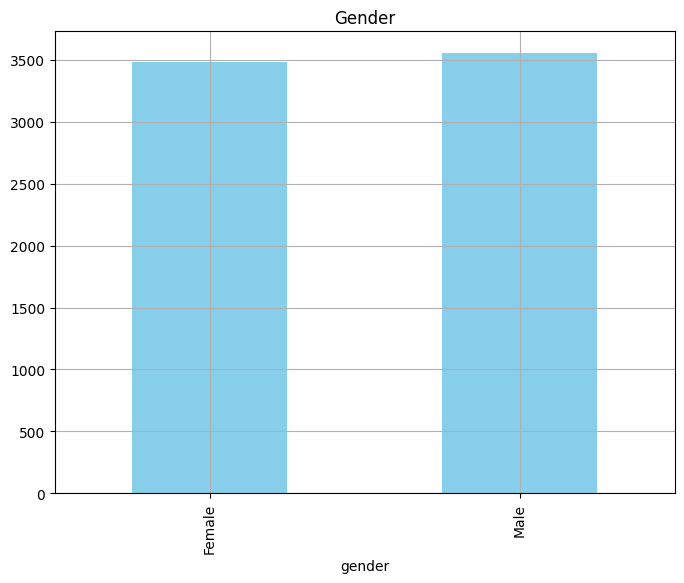

In [22]:
df.groupby('gender').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Gender'
)
plt.show()

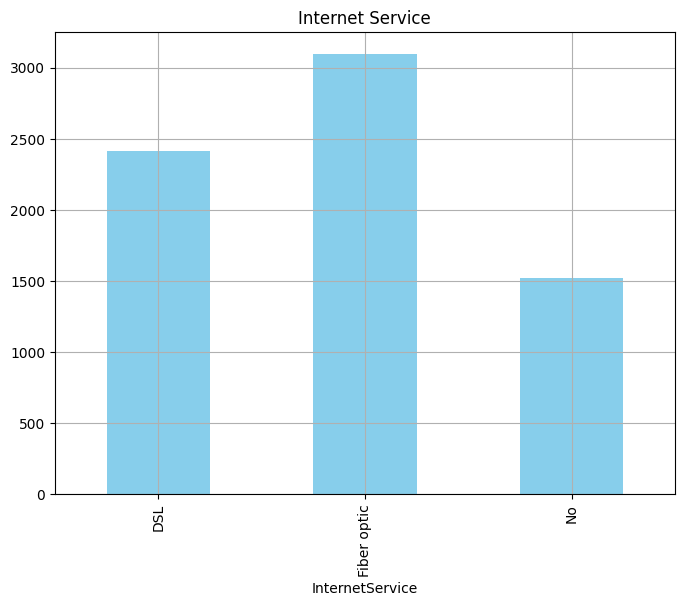

In [23]:
df.groupby('InternetService').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Internet Service'
)
plt.show()

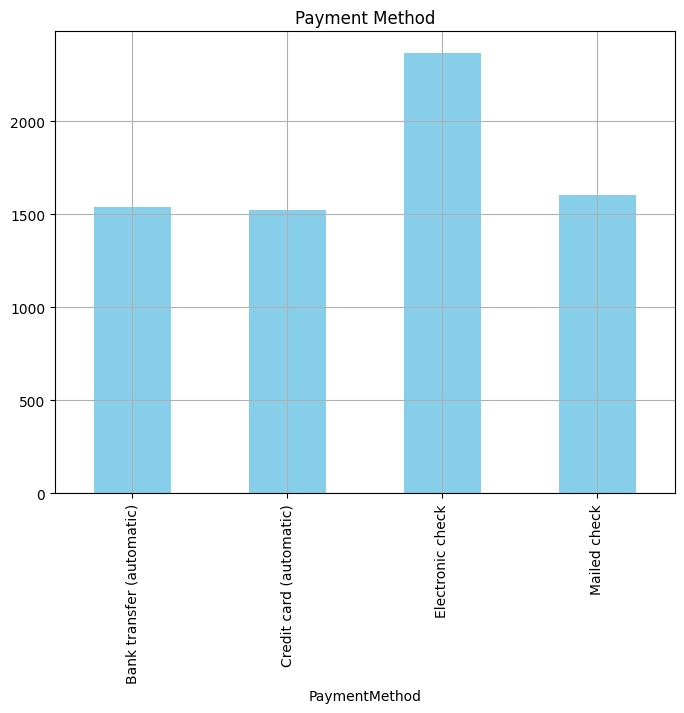

In [24]:
df.groupby('PaymentMethod').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Payment Method'
)
plt.show()

In [25]:
dummy_cols = []

sample_set = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)

for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+str(x) for x in dummy_vars.columns]
        sample_set = pd.concat([sample_set, dummy_vars], axis=1)
sample_set.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,genderFemale,genderMale,SeniorCitizen0,SeniorCitizen1,PartnerNo,PartnerYes,...,StreamingMoviesYes,ContractMonth-to-month,ContractOne year,ContractTwo year,PaperlessBillingNo,PaperlessBillingYes,PaymentMethodBank transfer (automatic),PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,-1.280157,-1.054244,-2.281382,0,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,0.064298,0.032896,0.389269,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,-1.239416,-0.061298,-1.452520,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0.512450,-0.467578,0.372439,0,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,-1.239416,0.396862,-1.234860,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
5,-0.994970,0.974468,-0.147808,1,True,False,True,False,True,False,...,True,True,False,False,False,True,False,False,True,False
6,-0.424595,0.786142,0.409363,0,False,True,True,False,True,False,...,False,True,False,False,False,True,False,True,False,False
7,-0.913487,-1.059891,-0.791550,0,True,False,True,False,True,False,...,False,True,False,False,True,False,False,False,False,True
8,-0.180148,1.059269,0.696733,1,True,False,True,False,False,True,...,True,True,False,False,False,True,False,False,True,False
9,1.205048,0.009088,0.783956,0,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False


In [26]:
sample_set.shape

(7032, 47)

In [27]:
list(sample_set.columns)

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'genderFemale',
 'genderMale',
 'SeniorCitizen0',
 'SeniorCitizen1',
 'PartnerNo',
 'PartnerYes',
 'DependentsNo',
 'DependentsYes',
 'PhoneServiceNo',
 'PhoneServiceYes',
 'MultipleLinesNo',
 'MultipleLinesNo phone service',
 'MultipleLinesYes',
 'InternetServiceDSL',
 'InternetServiceFiber optic',
 'InternetServiceNo',
 'OnlineSecurityNo',
 'OnlineSecurityNo internet service',
 'OnlineSecurityYes',
 'OnlineBackupNo',
 'OnlineBackupNo internet service',
 'OnlineBackupYes',
 'DeviceProtectionNo',
 'DeviceProtectionNo internet service',
 'DeviceProtectionYes',
 'TechSupportNo',
 'TechSupportNo internet service',
 'TechSupportYes',
 'StreamingTVNo',
 'StreamingTVNo internet service',
 'StreamingTVYes',
 'StreamingMoviesNo',
 'StreamingMoviesNo internet service',
 'StreamingMoviesYes',
 'ContractMonth-to-month',
 'ContractOne year',
 'ContractTwo year',
 'PaperlessBillingNo',
 'PaperlessBillingYes',
 'PaymentMethodBank transfer (au

# **3. Train & Test Sets**

In [28]:
target_var = 'Churn'
features = [x for x in list(sample_set.columns) if x != target_var]

# **4. Aritificial Neural Network (ANN) with Keras**

In [3]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 a5818043f565cf74179b67eb52fc060587ccecb9540141c39d84fbcb37ecff8c
             Got        ba904bcd5e73fc724ff35f2b5f880335beefc7a07bfd2f5c205b7164df4e0e40



Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.70.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl.metad

In [ ]:
#pip install keras

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.3 MB 932.9 kB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 1.0 MB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 1.0 MB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 1.0 MB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 1.0 MB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 1.0 MB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 1.0 MB/s eta 0:00:01
   ------------------------ ---------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

### - Training a Neural Network Model

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    sample_set[features],
    sample_set[target_var],
    test_size=0.3
)

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
50/50 [==============================] - 2s 2ms/step - loss: 0.5338 - accuracy: 0.7371
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.7515
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.7911
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.7993
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8015
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8062
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8066
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8072
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8113
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8121
Epoch 11/50
50/50 [

### - Accuracy, Precision, Recall


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
in_sample_preds = [round(x[0]) for x in model.predict(X_train)]
out_sample_preds = [round(x[0]) for x in model.predict(X_test)]

66/66 [==============================] - 0s 1ms/step


In [ ]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

print('\n')

In-Sample Accuracy: 0.8196
Out-of-Sample Accuracy: 0.8014




In [ ]:
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

print('\n')

print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Precision: 0.6844
Out-of-Sample Precision: 0.6763


In-Sample Recall: 0.5794
Out-of-Sample Recall: 0.5277


### - ROC & AUC

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
in_sample_preds = [x[0] for x in model.predict(X_train)]
out_sample_preds = [x[0] for x in model.predict(X_test)]


66/66 [==============================] - 0s 2ms/step


In [ ]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8666
Out-Sample AUC: 0.8471


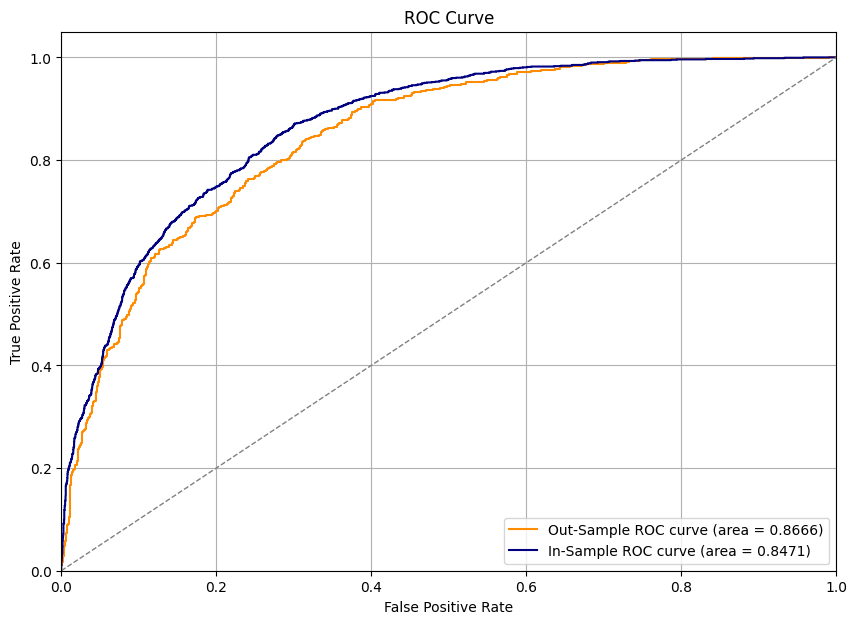

In [ ]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()